#### 𝑫𝒐 𝒔𝒉𝒂𝒓𝒌𝒔 𝒕𝒖𝒓𝒏 𝒊𝒏𝒕𝒐 𝒘𝒆𝒓𝒆𝒘𝒐𝒍𝒗𝒆𝒔 𝒖𝒏𝒅𝒆𝒓 𝒂 𝒇𝒖𝒍𝒍 𝒎𝒐𝒐𝒏?

<img src="img/wereshark.PNG" alt="drawing" width="500"/>



#### Intalling analysis & visualization tools 

In [ ]:
!pip install xlrd
!pip install seaborn    
!pip install plotly 

In [ ]:
!pip install ydata-profiling --user

In [6]:
import pandas as pd
sharks = pd.read_excel("GSAF5.xlxs")

In [64]:
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
from ydata_profiling import ProfileReport

#### Process of cleaning columns that were not relevant to our hypothesis

In [8]:
#sharks['Time'].values

In [9]:
'''#def convert_time(value):
    #if value == np.nan: 
        #return np.nan
    #if type(value) != str:
        #return np.nan
    #if len(value) != 5:
      #  return np.nan
   # if value[2] != "h":
    #    return np.nan
    #hours = value[0:2]
    #minutes = value[3:5]
    if hours.isdigit() and minutes.isdigit():
        return int(hours)*60 + int(minutes)
    else:
        return np.nan'''

'#def convert_time(value):\n    #if value == np.nan: \n        #return np.nan\n    #if type(value) != str:\n        #return np.nan\n    #if len(value) != 5:\n      #  return np.nan\n   # if value[2] != "h":\n    #    return np.nan\n    #hours = value[0:2]\n    #minutes = value[3:5]\n    if hours.isdigit() and minutes.isdigit():\n        return int(hours)*60 + int(minutes)\n    else:\n        return np.nan'

In [10]:
#print(convert_time("16h45"))

In [11]:
#sharks['Time'].apply(convert_time)

In [12]:
#minutes = sharks['Time'].apply(convert_time)

In [13]:
#sharks['minutes'] = minutes

In [15]:
'''dirty_injury = {'Swimming': ['Swimming', '4 men were bathing', 'Crew swimming alongside their anchored ship'], 'Surfing': ['Surfing'], 'Maritime Incident': ['Wreck of  large double sailing canoe'] }

for activity, dirty_activity in dirty_activity.items():
    for incorrect in incorrect_list:
        sharks['Activity'].replace (incorrect, activity,inplace=True) 


SyntaxError: EOF while scanning triple-quoted string literal (2887684048.py, line 5)

In [ ]:
'''sharks.loc[:, 'Injury'] = sharks['Injury'].str.lower() 

In [ ]:
'''dirty_activity = {'Swimming': ['Swimming', '4 men were bathing', 'Crew swimming alongside their anchored ship'], 'Surfing': ['Surfing'], 'Maritime Incident': ['Wreck of  large double sailing canoe'] }

for activity, dirty_activity in dirty_activity.items():
    for incorrect in incorrect_list:
        sharks['Activity'].replace (incorrect, activity,inplace=True) 


A first glance into our data: we thought it would be interesting to explore external factors that may also contribute to the number of attacks
Which inspired us to look into moon phases


In [16]:
sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data cleaning process:

In [17]:
sharks['Sex'].nunique() 

8

In [18]:
sharks['Sex'] = sharks['Sex'].str.strip() #stripping spaces before and after gender input
sharks = sharks[sharks['Sex'].isin(['M', 'F'])] #removing all inputs that are not M/F

In [19]:
sharks['Type'].nunique()

10

In [20]:
sharks = sharks.drop('Activity', axis=1) #deleted this column by mistake, however it was not relevant to the data

In [21]:
sharks = sharks.drop('pdf', axis=1) #deleting unnecessary column 'PDF' using drop method

In [22]:
sharks = sharks.drop('href formula', axis=1) #deleting unnecessary column 'HREF' using drop method

In [23]:
sharks = sharks.drop('Case Number', axis=1) #deleting unnecessary column 'Case Number' using drop method

In [24]:
sharks = sharks.drop('Case Number.1', axis=1) #deleting unnecessary column 'Case Number 1' using drop method

In [25]:
sharks = sharks.drop('original order', axis=1) #deleting unnecessary column 'original order' using drop method

In [26]:
sharks = sharks.drop('Unnamed: 11', axis=1) #deleting unnecessary column 'Unnamed: 11' using drop method

In [27]:
sharks = sharks.drop('Unnamed: 21', axis=1)#deleting unnecessary column 'Unnamed: 21' using drop method

In [28]:
sharks = sharks.drop('Unnamed: 22', axis=1) #deleting unnecessary column 'Unnamed: 22' using drop method

In [29]:
sharks['Type'].unique() #checking for unique Variables in the type column

array(['Unprovoked', ' Provoked', 'Provoked', 'Questionable',
       'Watercraft', 'Sea Disaster', nan, '?', 'Unverified', 'Invalid',
       'Under investigation'], dtype=object)

In [30]:
types = {'Unprovoked': ['Unprovoked'], 'Provoked':[' Provoked', 'Provoked'], 
        'Unverified': ['Questionable', 'Unconfirmed', 'Unverified','Invalid', 'Under investigation', '?'], 'Marine Incident': ['Boat', 'Sea Disaster', 'Watercraft']}
for type, incorrect_list in types.items():
    for incorrect in incorrect_list:
        sharks['Type'].replace (incorrect, type,inplace=True) #organizing category types for consistency and to avoid repitition 


In [31]:
sharks = sharks.dropna(subset = ['Type']) #dropping the NaN's in the type subset to only display valid input

In [32]:
sharks['Type'] = sharks['Type'].str.strip()  #further cleaning by stripping spaces before and after data entry 

In [33]:
sharks['Type'].unique() #enuring no more duplicates remain

array(['Unprovoked', 'Provoked', 'Unverified', 'Marine Incident'],
      dtype=object)

In [34]:
sharks.loc[:, 'Country'] = sharks['Country'].str.upper() #converting country column to uppercase 

In [35]:
sharks = sharks.dropna(subset = ['Country'])  #dropping the NaN's in the type subset to only display valid input

In [36]:
sharks['Country'] = sharks['Country'].str.strip() #further cleaning by stripping spaces before and after data entry 

Cleaning the country column: mapping incorrect country names to their corrected versions:

In [37]:
#This dictionary maps incorrect country names to their corrected versions.
country_groups = {'ASIA': ['ASIA?'], 
                  'ST. MARTIN': ['ST. MAARTIN', 'ST MARTIN'], 'SAMOA': ['WESTERN SOMOA'], 'ANDAMAN ISLANDS': ['ANDAMAN / NICOBAR ISLANDAS'], 'PORTUGAL': ['AZORES'], 'GREAT BRITIAN': ['BRITISH ISLES'], 'PAPUA NEW GUINEA': ['BRIISH NEW GUINEA', 'NEW GUINEA'], 'CARIBBEAN SEA': ['BRITISH VIRGIN ISLANDS','BRITISH WEST INDIES'], 'SRI LANKA':  ['CEYLON (SRI LANKA)'], 'COLOMBIA': ['COLUMBIA'], 'INDIAN OCEAN': ['INDIAN OCEAN?'], 'IRAN':['IRAN / IRAQ'],
'ITALY': ['ITALY / CROATIA'], 'SOLOMON ISLANDS': ['SOLOMON ISLANDS / VANUATU'], 'SAMOA': ['WESTERN SAMOA'], 'SUDAN': ['SUDAN?'], 'TRINIDAD & TOBAGO': ['TOBAGO', 'TRINIDAD & TOBAGE'], 'TURKS & CAICOS': ['TURKS AND CAICOS'],  'UNITED ARAB EMIRATES': ['UNITED ARAB EMIRATES (UAE)'], 'EGYPT': ['EGYPT / ISRAEL'], 'RED SEA': ['RED SEA / INDIAN OCEAN'], 'ST KITTS & NEVIS': ['ST KITTS / NEVIS'], }
 
#The nested loops iterate through the dictionary and replace each 
# incorrect name in the 'Country' column of the sharks DataFrame with the correct name.
for country, incorrect_list in country_groups.items():
    for incorrect in incorrect_list:
        sharks['Country'].replace (incorrect, country,inplace=True)



In [38]:
unique_countries = sharks['Country'].unique() #assigning a variable name to unique country in order to sort 

In [39]:
sorted_countries = sorted(unique_countries) #sorting the countries to analyze all names
sorted_countries

['ADMIRALTY ISLANDS',
 'AFRICA',
 'ALGERIA',
 'AMERICAN SAMOA',
 'ANDAMAN ISLANDS',
 'ANGOLA',
 'ANTIGUA',
 'ARGENTINA',
 'ARUBA',
 'ASIA',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'BAHAMAS',
 'BAHREIN',
 'BARBADOS',
 'BAY OF BENGAL',
 'BELIZE',
 'BERMUDA',
 'BETWEEN PORTUGAL & INDIA',
 'BRAZIL',
 'BRITISH NEW GUINEA',
 'BRITISH OVERSEAS TERRITORY',
 'BURMA',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CENTRAL PACIFIC',
 'CEYLON',
 'CHILE',
 'CHINA',
 'COAST OF AFRICA',
 'COLOMBIA',
 'COOK ISLANDS',
 'CORAL SEA',
 'COSTA RICA',
 'CRETE',
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'DIEGO GARCIA',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EL SALVADOR',
 'ENGLAND',
 'EQUATORIAL GUINEA / CAMEROON',
 'FALKLAND ISLANDS',
 'FEDERATED STATES OF MICRONESIA',
 'FIJI',
 'FRANCE',
 'FRENCH POLYNESIA',
 'GABON',
 'GEORGIA',
 'GHANA',
 'GRAND CAYMAN',
 'GREAT BRITIAN',
 'GREECE',
 'GRENADA',
 'GUAM',
 'GUATEMALA',
 'GUINEA',
 'GUYANA',
 'HAITI',
 'HONDURAS',
 'HONG KONG',
 'ICEL

In [40]:
sharks.loc[:, "date_clean"] = pd.to_datetime(sharks['Date'], format='%d-%b-%Y', errors='coerce') 
#converting to date time using pd.to_datetime function, specifying the date format 
# as '%d-%b-%Y' to match the format in the 'Date' column. #coercing all errors to set to NaT


In [41]:
sharks = sharks[sharks["date_clean"] > pd.Timestamp("1970-01-01")] #filtering through the dates column to only include dates after 1970

In [42]:
sharks = sharks.dropna(subset = ['Date']) #dropping all the nans of the date subset 

In [43]:
sharks['date_clean'] = pd.to_datetime(sharks['Date'], errors='coerce', dayfirst=True) #ensuring day is first

In [44]:
sharks['date_clean'].info() #checking to ensure it is in datetime64 format

<class 'pandas.core.series.Series'>
Int64Index: 3341 entries, 5 to 6479
Series name: date_clean
Non-Null Count  Dtype         
--------------  -----         
3341 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 52.2 KB


In [45]:
sharks['Sex'] = sharks['Sex'].str.strip() #stripping spaces from sex column
sharks = sharks[sharks['Sex'].isin(['M', 'F'])] #filtering out everything that isn't M/F

Importing an external dataset by the US navy to view the moon phases through webscraping

In [46]:
import json #imported the json library
import urllib.request #help in opening URLs
import pandas as pd 

json_list = [] #created an empty list to append all the years 
for year in range(1970,2020): #created a for loop to iterate through all years, changing the year at the end of the URL in {year}
    f = urllib.request.urlopen(f'https://aa.usno.navy.mil/api/moon/phases/year?year={year}') #setting a variable F to store the years
    json_list.append(json.load(f)) #append all the data in the list to our empty list json_list = []

print(json_list)

[{'apiversion': '4.0.1', 'numphases': 49, 'phasedata': [{'day': 7, 'month': 1, 'phase': 'New Moon', 'time': '20:35', 'year': 1970}, {'day': 14, 'month': 1, 'phase': 'First Quarter', 'time': '13:18', 'year': 1970}, {'day': 22, 'month': 1, 'phase': 'Full Moon', 'time': '12:55', 'year': 1970}, {'day': 30, 'month': 1, 'phase': 'Last Quarter', 'time': '14:38', 'year': 1970}, {'day': 6, 'month': 2, 'phase': 'New Moon', 'time': '07:13', 'year': 1970}, {'day': 13, 'month': 2, 'phase': 'First Quarter', 'time': '04:10', 'year': 1970}, {'day': 21, 'month': 2, 'phase': 'Full Moon', 'time': '08:19', 'year': 1970}, {'day': 1, 'month': 3, 'phase': 'Last Quarter', 'time': '02:33', 'year': 1970}, {'day': 7, 'month': 3, 'phase': 'New Moon', 'time': '17:42', 'year': 1970}, {'day': 14, 'month': 3, 'phase': 'First Quarter', 'time': '21:16', 'year': 1970}, {'day': 23, 'month': 3, 'phase': 'Full Moon', 'time': '01:52', 'year': 1970}, {'day': 30, 'month': 3, 'phase': 'Last Quarter', 'time': '11:05', 'year': 1

In [47]:
year_dfs = [] #created an empty list to store the list in a data frame
for year_json in json_list: #initiated a forloop to iterate through the years in the list
    year_dfs.append(pd.DataFrame(year_json['phasedata'])) #append all data into data frame


In [48]:
moon_data = pd.concat(year_dfs, ignore_index=True) #concatenated the data for all years here, so that the years are aggregated and when we print the data frame, we get a comprehensive output, not just the output for one year

In [49]:
moon_data.head() #getting a first glance at the data

,day,month,phase,time,year
0,7,1,New Moon,20:35,1970
1,14,1,First Quarter,13:18,1970
2,22,1,Full Moon,12:55,1970
3,30,1,Last Quarter,14:38,1970
4,6,2,New Moon,07:13,1970


Cleaning the moon phases data

In [50]:
moon_data['date_clean'] = pd.to_datetime(moon_data[['day', 'month', 'year']]) #organizing date format


In [51]:
moon_data  = moon_data.dropna(subset = ['phase'])  #drop the NAN's of the moon data

In [52]:
moon_data['date_clean'].unique() #ensuring everything is cleaned

array(['1970-01-07T00:00:00.000000000', '1970-01-14T00:00:00.000000000',
       '1970-01-22T00:00:00.000000000', ...,
       '2019-12-12T00:00:00.000000000', '2019-12-19T00:00:00.000000000',
       '2019-12-26T00:00:00.000000000'], dtype='datetime64[ns]')

In [53]:
print(sharks.head()) #getting a glimpse into both data sets, to get an initial idea of how to merge
print(moon_data.head())

           Date    Year        Type       Country                  State  \
5   04-Feb-2024  2024.0    Provoked      TRINIDAD                    NaN   
8   09-Jan-2024  2024.0  Unprovoked     AUSTRALIA        South Australia   
9   05-Jan-2024  2024.0    Provoked  SOUTH AFRICA  Eastern Cape Province   
14  24-Dec-2023  2023.0  Unprovoked     AUSTRALIA      Western Australia   
70  23-Jun-2023  2023.0  Unprovoked           USA                Florida   

                       Location               Name Sex  Age  \
5                           NaN               male   M  NaN   
8       Walkers Beach, Elliston       Murray Adams   M   64   
9                 Papiesfontein               male   M   62   
14                 Wedge Island         Troy Brown   M   46   
70  Cocoa Beach, Brevard County  Magnolia Woodhead   F   !2   

                                               Injury   Time  \
5                                     Shoulder bitten  06h30   
8                                   

Now, time to merge both data sets!

In [103]:
merged_data = sharks.merge(moon_data, on='date_clean', how='left') #merging to the left

In [104]:
phase_count = {} #creating a dictionary to count how many times shark attack dates match up with moon phases from our data
for phase in merged_data['phase'].unique():
    phase_count[phase] = len(merged_data[merged_data['phase'] == phase])

In [105]:
phase_count

{nan: 0,
 'New Moon': 104,
 'Full Moon': 116,
 'First Quarter': 117,
 'Last Quarter': 79}

In [106]:
if 'nan' in phase_count: #cleaning the nans in phase count
    del phase_count['nan']

In [107]:
# prepare data for plotting
phases = list(phase_count.keys())
counts = list(phase_count.values())

Merged data, which illustrates the amount of shark attacks that happen during different moon phases. In this case there are 416 individual attacks

In [108]:
merged_data

,Date,Year,Type,Country,State,Location,Name,Sex,Age,Injury,Time,Species,Source,href,date_clean,day,month,phase,time,year
0,04-Feb-2024,2024.0,Provoked,TRINIDAD,NaN,NaN,male,M,NaN,Shoulder bitten,06h30,Blacktip reef shark,"Trinidad Guardian, 2/11/2014",NaN,2024-02-04,NaN,NaN,NaN,NaN,NaN
1,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Murray Adams,M,64,Leg bitten,13h00,White shark,"A. Currie, GSAF",NaN,2024-01-09,NaN,NaN,NaN,NaN,NaN
2,05-Jan-2024,2024.0,Provoked,SOUTH AFRICA,Eastern Cape Province,Papiesfontein,male,M,62,Provoked incident. Lacerations and puncture wo...,NaN,Raggedtooth shark,Jacaranda fm. 12/6/2024,NaN,2024-01-05,NaN,NaN,NaN,NaN,NaN
3,24-Dec-2023,2023.0,Unprovoked,AUSTRALIA,Western Australia,Wedge Island,Troy Brown,M,46,Puncture wounds to right ankle,15h00,Broze whaler?,"9 News, 12/25/2023",NaN,2023-12-24,NaN,NaN,NaN,NaN,NaN
4,23-Jun-2023,2023.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Magnolia Woodhead,F,!2,Multiple puncture wounds to right thigh,NaN,NaN,"Fox 35, 6/29/2023",NaN,2023-06-23,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,23-Jan-1970,1970.0,Unprovoked,MOZAMBIQUE,Limpopo River,"Gijana, 150 km inland",Betual Tivane,M,16,Leg severed at knee,NaN,Zambesi shark,"Natal Daily News, 2/4/1970; D. Davies",http://sharkattackfile.net/spreadsheets/pdf_di...,1970-01-23,NaN,NaN,NaN,NaN,NaN
3337,23-Jan-1970,1970.0,Unprovoked,MOZAMBIQUE,Limpopo River,"Gijana, 150 km inland",Mabua Mogadura,M,12,"Arm severed, thigh bitten",NaN,Zambesi shark,"Natal Daily News, 2/4/1970; D. Davies",http://sharkattackfile.net/spreadsheets/pdf_di...,1970-01-23,NaN,NaN,NaN,NaN,NaN
3338,23-Jan-1970,1970.0,Unprovoked,MOZAMBIQUE,Limpopo River,"Gijana, 150 km inland",Elissane Mobunda,M,10,Leg severed at knee,NaN,Zambesi shark,"Natal Daily News, 2/4/1970; D. Davies",http://sharkattackfile.net/spreadsheets/pdf_di...,1970-01-23,NaN,NaN,NaN,NaN,NaN
3339,10-Jan-1970,1970.0,Unprovoked,MEXICO,Guerrero,Acapulco,Jack Kardell,M,22,Leg bitten,NaN,NaN,"A. Resciniti, p.110",http://sharkattackfile.net/spreadsheets/pdf_di...,1970-01-10,NaN,NaN,NaN,NaN,NaN


In [109]:
#profile = ProfileReport(merged_data, title="Profiling Report")

In [110]:
merged_data  = merged_data.dropna(subset = ['phase']) #cleaning merged data

Creating a copy of the merged data set for visualization, keeping only the columns that I need

In [111]:
columns_to_keep = [  'Type', 'Sex', 'date_clean', 'phase' ]

moonshark = merged_data[columns_to_keep].copy()

In [112]:
columns_to_keep= [ 'date_clean', 'phase', 'Country' ]

country_phase = merged_data[columns_to_keep].copy()

In [113]:
country_phase

,date_clean,phase,Country
316,2019-12-26,New Moon,PAPUA NEW GUINEA
317,2019-12-26,New Moon,SOUTH AFRICA
320,2019-12-12,Full Moon,REUNION ISLAND
322,2019-12-04,First Quarter,CUBA
330,2019-11-12,Full Moon,USA
...,...,...,...
3291,1972-05-06,Last Quarter,FRENCH POLYNESIA
3307,1971-09-05,Full Moon,AUSTRALIA
3311,1971-06-30,First Quarter,SOUTH AFRICA
3312,1971-06-01,First Quarter,GREAT BRITIAN


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24436\2047405004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data.drop(columns=['date_clean'], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24436\2047405004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['phase'].fillna('Unknown', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24436\2047405004.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='phase', y='count', da

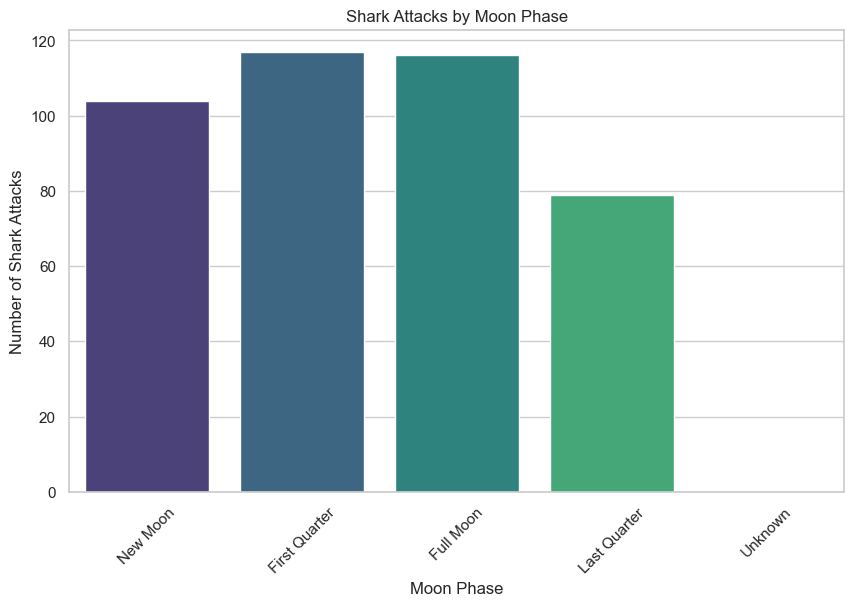

In [114]:
# Drop the redundant 'date' column from moon_phase_data
merged_data.drop(columns=['date_clean'], inplace=True)

# Fill missing moon phases with 'Unknown'
merged_data['phase'].fillna('Unknown', inplace=True)

# Count the number of shark attacks for each moon phase
phase_counts = merged_data['phase'].value_counts().reset_index()
phase_counts.columns = ['phase', 'count']

# Sort the phases for logical ordering
phase_order = ['New Moon', 'First Quarter', 'Full Moon', 'Last Quarter', 'Unknown']
phase_counts['phase'] = pd.Categorical(phase_counts['phase'], categories=phase_order, ordered=True)
phase_counts.sort_values('phase', inplace=True)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='phase', y='count', data=phase_counts, palette='viridis')

# Add titles and labels
plt.title('Shark Attacks by Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Number of Shark Attacks')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Visualizing the results of first hypothesis:  are shark attacks more likely to happen when the moon is fuller?

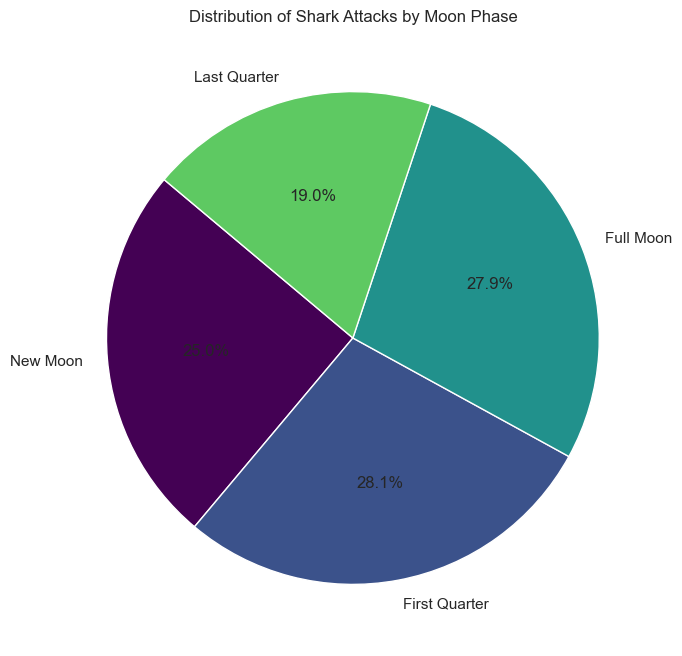

In [122]:
#creating a pie chart to display the disribution of shark attacks by moon phase
plt.figure(figsize=(8, 8))
plt.pie(phase_counts['count'], labels=phase_counts['phase'], autopct='%1.1f%%', startangle=140, colors =  ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725'])
plt.title('Distribution of Shark Attacks by Moon Phase')


plt.show()

The results shown here are inconclusive. There isn't enough data to support our hypothesis. However, it is interesting to observe the drop in shark attacks during the last quarter. 

<img src="img/moonphases.PNG" alt="drawing" width="500"/>


In [ ]:
moonshark

,Type,Sex,date_clean,phase
316,Unprovoked,M,2019-12-26,New Moon
317,Unprovoked,M,2019-12-26,New Moon
320,Unverified,M,2019-12-12,Full Moon
322,Unprovoked,M,2019-12-04,First Quarter
330,Unprovoked,M,2019-11-12,Full Moon
...,...,...,...,...
3291,Unprovoked,M,1972-05-06,Last Quarter
3307,Unprovoked,M,1971-09-05,Full Moon
3311,Unprovoked,M,1971-06-30,First Quarter
3312,Unprovoked,M,1971-06-01,First Quarter


Testing Hypothesis #2: are attacks under full moon unprovoked?

In [ ]:
phase_type_counts

,phase,Type,count
0,First Quarter,Marine Incident,5
1,First Quarter,Provoked,13
2,First Quarter,Unprovoked,92
3,First Quarter,Unverified,7
4,Full Moon,Marine Incident,4
5,Full Moon,Provoked,8
6,Full Moon,Unprovoked,97
7,Full Moon,Unverified,7
8,Last Quarter,Marine Incident,3
9,Last Quarter,Provoked,2


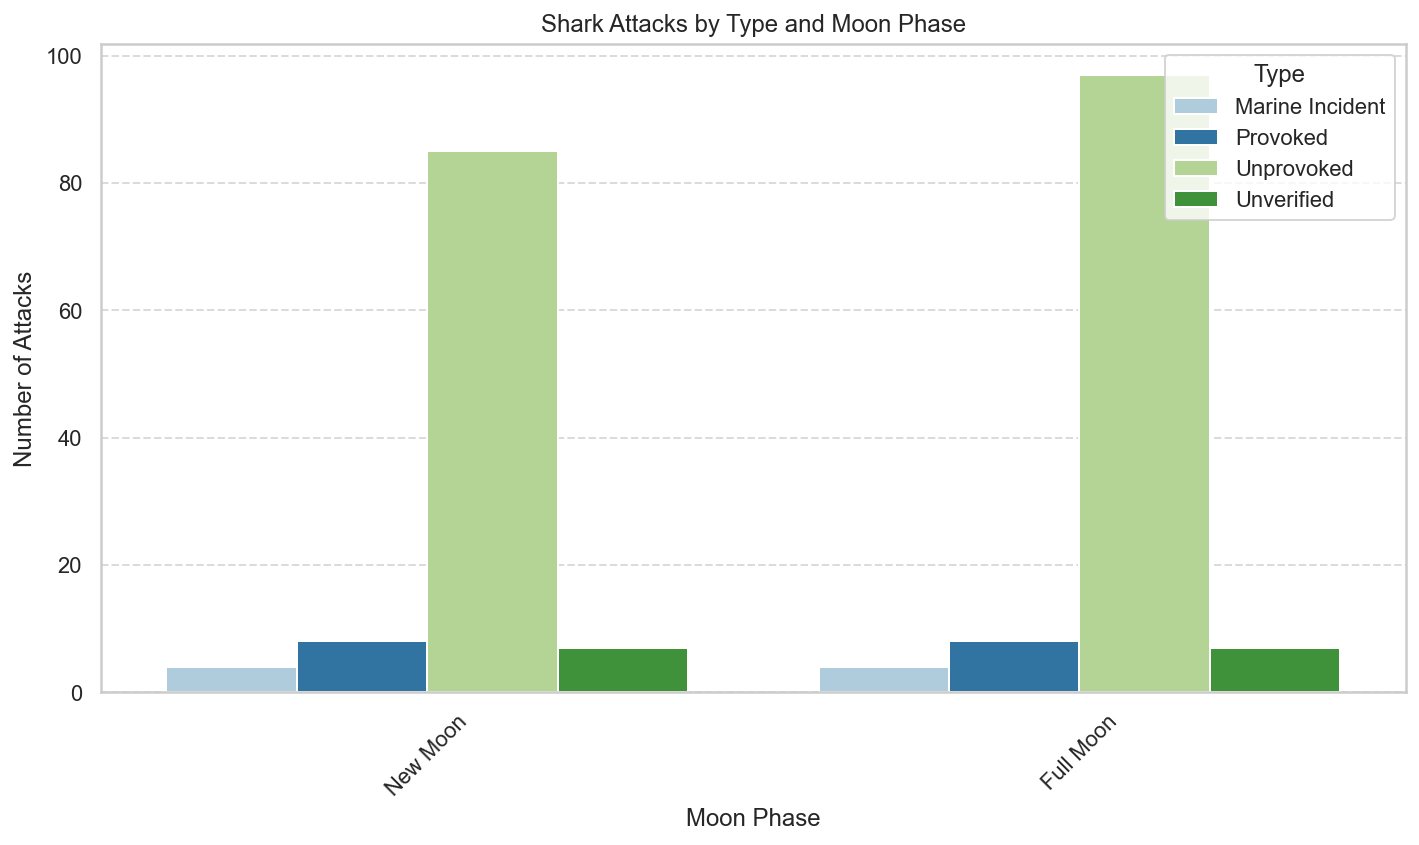

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='phase', y='count', hue='Type', data=phase_type_counts, palette='Paired', ci =None, order=['New Moon', 'Full Moon'])
plt.title('Shark Attacks by Type and Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<img src="img/nbc.PNG" alt="drawing" width="700"/>








<img src="img/typeattack.PNG" alt="drawing" width="500"/>








In [ ]:
phase_type_counts = merged_data.groupby(['phase', 'Type']).size().reset_index(name='count')


In [ ]:
moonphase_attacks

phase
First Quarter    117
Full Moon        116
Last Quarter      79
New Moon         104
Name: Sex, dtype: int64

In [ ]:
#h1 = sharks.copy()
#h1_columns = ["activity", "sex", "fatal"]
#h1 = h1[h1_columns]
#h1.head()

moonsharks = merged_data.copy()
moonshark_columns = ['date_clean', 'phase']
moonsharks = moonsharks[moonshark_columns]
moonsharks.head()

,date_clean,phase
316,2019-12-26,New Moon
317,2019-12-26,New Moon
320,2019-12-12,Full Moon
322,2019-12-04,First Quarter
330,2019-11-12,Full Moon
